# Simulating Evolution
#### Today we're going to do some simulation. In other words, we're going to imagine a simple scenario where evolution may occur over time, and explore what happens as we let the system go on its own.

#### What kinds of things might be relevant in this kind of simulation? Before we get there, let's talk about what evolution actually is.

### What is Evolution?

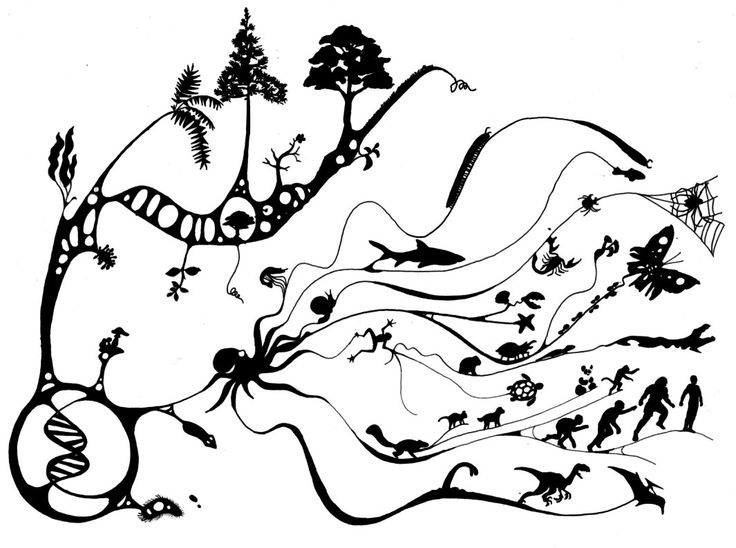

# Evolution is defined as the change in allele frequencies within a population over time.

### That's it! It's that simple. Evolution itself doesn't require new species, or big changes, or anything dramatic. All of those things are possible, but they come out of small changes in populations over many millions of years.

### So if that's all evolution is, then how might we simulate it? Well we want an imaginary population in an imaginary environment, and we need there to be some variation in that population to represent the allele frequencies that can change. Let's go ahead and represent this with colors!

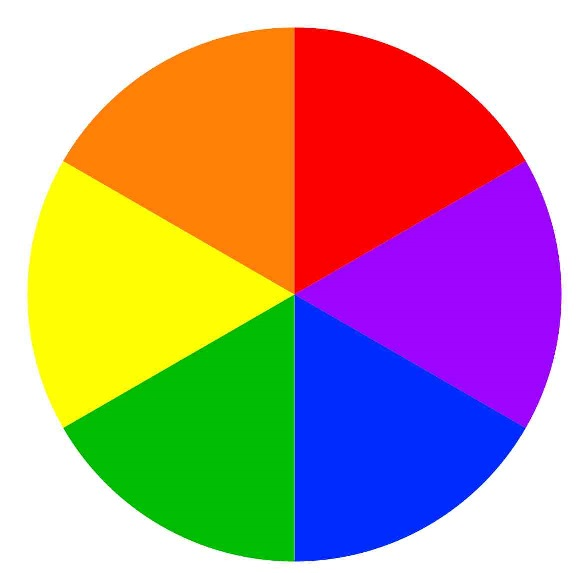

### So in order to do our simulation, let's imagine that the animals in the population can be any of the three primary colors (that is, blue, red, or yellow). Let's also imagine that the environment can be represented by the secondary colors (green, orange, and purple). If the environment is 'purple', we'll say that that's good for red and blue animals, but not as good for yellow animals, and similarly for the other colors. Everyone on the same page so far?

### Now there's one more important step in our simulation: time! We need a way to see how the population is changing. Now, we could do this manually. First we need to come up with some rules for how to go from one generation to the next. I've come up with two sets of rules:

### 1) For each individual, compare the individual's color with the environment color and see how many dice to roll.
### 2) For each die roll, consult the table and determine what happens.

### Color Match Generation Multiplier

| Individual Color | Green Environment | Orange Environment | Purple Environment |
| --- | --- | --- | --- |
| Red | 1 | 3 | 3 |
| Yellow | 3 | 3 | 1 |
| Blue | 3 | 1 | 3 |

### Die Roll Results

| Die Roll | Result |
| --- | --- |
| 1 | Death |
| 2 | 1 Offspring |
| 3 | 1 Offspring |
| 4 | 2 Offspring |
| 5 | 2 Offspring |
| 6 | Mutation |

### You may be wondering what that mutation is for! We're going to allow random mutations to pop up, so if we get a 6 on a die roll, we're going to create one new individual of a random color, potentially including new colors to match the environment colors!

### Now, this seems like a lot of work, but luckily we can write some code to do most of the heavy lifting for us. This is not a computer science class, so we're not going to talk about any of this code, but the stuff that we're talking about above is how it's going to be working.

In [122]:
import random
import pandas as pd
from collections import Counter

multipliers = {
    'red':    {'purple': 3, 'orange': 3, 'green': 1},
    'yellow': {'purple': 1, 'orange': 3, 'green': 3},
    'blue':   {'purple': 3, 'orange': 1, 'green': 3},
    'purple': {'purple': 4, 'orange': 2, 'green': 2},
    'orange': {'purple': 2, 'orange': 4, 'green': 2},
    'green':  {'purple': 2, 'orange': 2, 'green': 4}
}

num_gens = 100
carrying_cap = 1000

class Animal:
    def __init__(self, color):
        self.c = color
    def __repr__(self):
        return "A(n) {} animal".format(self.c)
    def __str__(self):
        return "{}".format(self.c)
    def __eq__(self, other):
        return self.c == other.c
    def __hash__(self):
        return hash((self.c))
    def mutate(self):
        new_c = self.c
        colors = {
            1: 'red',
            2: 'yellow',
            3: 'blue',
            4: 'purple',
            5: 'orange',
            6: 'green'
        }
        while new_c == self.c:
            new_c = colors[random.randint(1,6)]
        return new_c
    def next_gen(self, env_color, new_pop):
        num_dice = multipliers[self.c][env_color]
        i = 0
        while i < num_dice:
            roll = random.randint(1,6)
            if roll == 1:
#                 print('death')
                break
            elif roll > 1 and roll < 4:
#                 print(' 1 offspring')
                new_pop.append(Animal(self.c))
            elif roll > 3 and roll < 6:
#                 print('2 offspring')
                new_pop.append(Animal(self.c))
                new_pop.append(Animal(self.c))
            else:
#                 print('mutation')
                new_pop.append(Animal(self.mutate()))
            i += 1

first_gen = [
    Animal('red'),
    Animal('red'),
    Animal('red'),
    Animal('red'),
    Animal('yellow'),
    Animal('yellow'),
    Animal('yellow'),
    Animal('yellow'),
    Animal('blue'),
    Animal('blue'),
    Animal('blue'),
    Animal('blue'),
    ]

env_history = []

def new_generation(prev_gen):
    next_gen = []
    
    environment_states = {
        1: 'purple',
        2: 'orange',
        3: 'green'
    }
    
    environment = environment_states[random.randint(1,3)]
#     environment = 'purple'
    env_history.append(environment)
    
    # print(environment)
    
    for member in prev_gen:
        member.next_gen(environment, next_gen)
        if len(next_gen) >= carrying_cap:
            break
    
    # print(Counter(next_gen))
    random.shuffle(next_gen)
    return next_gen

In [123]:
generations = {}
gen = 1
generations[gen] = (first_gen)

while len(generations.values()) < num_gens:
#     print('GENERATION {}'.format(gen))
#     print(generations[gen])
    gen += 1
    generations[gen] = (new_generation(generations[gen - 1]))
    generations[gen - 1] = Counter(generations[gen - 1])

generations[num_gens] = Counter(generations[num_gens])

df = pd.DataFrame.from_dict(generations, orient='index')

<AxesSubplot:>

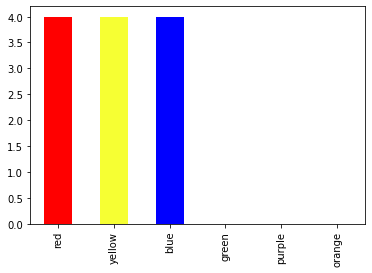

In [124]:
color_dict = {Animal('red'): '#FF0000', Animal('blue'): '#0000FF', Animal('yellow'): '#F6FF33', Animal('green'): '#37FF33', Animal('orange'): '#FB9710', Animal('purple'): '#FB10E9'}

df.loc[1].plot(kind='bar', color=[color_dict.get(x, '#333333') for x in df.columns])

<AxesSubplot:>

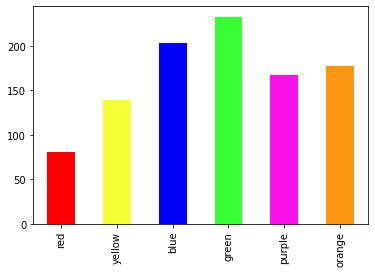

In [125]:
df.loc[30].plot(kind='bar', color=[color_dict.get(x, '#333333') for x in df.columns])

<AxesSubplot:>

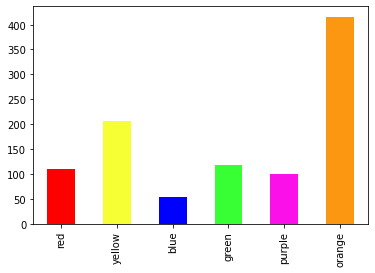

In [126]:
df.loc[70].plot(kind='bar', color=[color_dict.get(x, '#333333') for x in df.columns])

<AxesSubplot:>

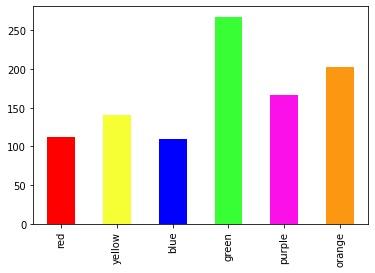

In [127]:
df.loc[100].plot(kind='bar', color=[color_dict.get(x, '#333333') for x in df.columns])

In [128]:
# redo with only purple env

def new_generation(prev_gen):
    next_gen = []
    
    environment_states = {
        1: 'purple',
        2: 'orange',
        3: 'green'
    }
    
#     environment = environment_states[random.randint(1,3)]
    environment = 'purple'
    env_history.append(environment)
    
    # print(environment)
    
    for member in prev_gen:
        member.next_gen(environment, next_gen)
        if len(next_gen) >= carrying_cap:
            break
    
    # print(Counter(next_gen))
    random.shuffle(next_gen)
    return next_gen

generations = {}
gen = 1
generations[gen] = (first_gen)

while len(generations.values()) < num_gens:
#     print('GENERATION {}'.format(gen))
#     print(generations[gen])
    gen += 1
    generations[gen] = (new_generation(generations[gen - 1]))
    generations[gen - 1] = Counter(generations[gen - 1])

generations[num_gens] = Counter(generations[num_gens])

df = pd.DataFrame.from_dict(generations, orient='index')

<AxesSubplot:>

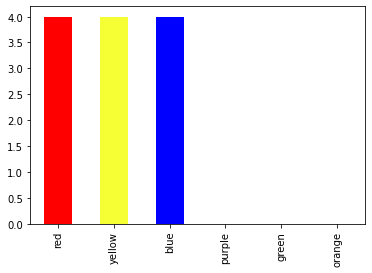

In [129]:
df.loc[1].plot(kind='bar', color=[color_dict.get(x, '#333333') for x in df.columns])

<AxesSubplot:>

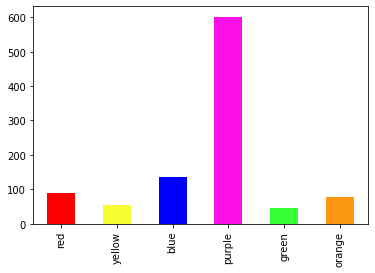

In [130]:
df.loc[30].plot(kind='bar', color=[color_dict.get(x, '#333333') for x in df.columns])

<AxesSubplot:>

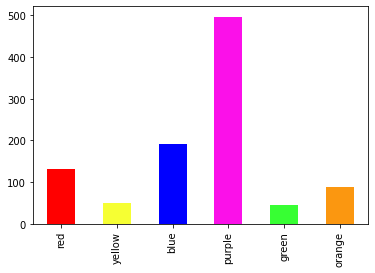

In [131]:
df.loc[70].plot(kind='bar', color=[color_dict.get(x, '#333333') for x in df.columns])

<AxesSubplot:>

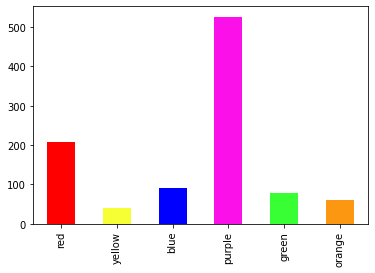

In [132]:
df.loc[100].plot(kind='bar', color=[color_dict.get(x, '#333333') for x in df.columns])